### ¿En qué ciudad se realiza un pedido determinado?

In [12]:
!pip install scikit-learn

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# 2. Cargar los datos
df = pd.read_csv("../dataset/taco_sales_2024-2025.csv")

### DEBO CORREGIR EL ERROR DESDE AQUI

In [17]:
# 3. Seleccionar variables
features = [
    'Taco Type', 'Taco Size', 'Toppings Count',
    'Price ($)', 'Tip ($)', 'Weekend Order',
    'Distance (km)', 'Delivery Duration (min)'
]

X = df[features].copy()
y = df['Is_Texas']

KeyError: 'Is_Texas'

In [ ]:
# 4. Codificar variables categóricas
le_type = LabelEncoder()
le_size = LabelEncoder()
le_weekend = LabelEncoder()

# Aplicar codificación segura
X.loc[:, 'Taco Type'] = le_type.fit_transform(X['Taco Type'])
X.loc[:, 'Taco Size'] = le_size.fit_transform(X['Taco Size'])
X.loc[:, 'Weekend Order'] = le_weekend.fit_transform(X['Weekend Order'])



C:\Users\gisse\AppData\Local\Temp\ipykernel_8160\1002383751.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1

In [ ]:
# 5. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# 6. Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# 7. Predicciones
y_pred = model.predict(X_test)



In [ ]:
# 8. Evaluación

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.60      0.68      0.64       119
        True       0.41      0.32      0.36        81

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.52      0.54      0.52       200



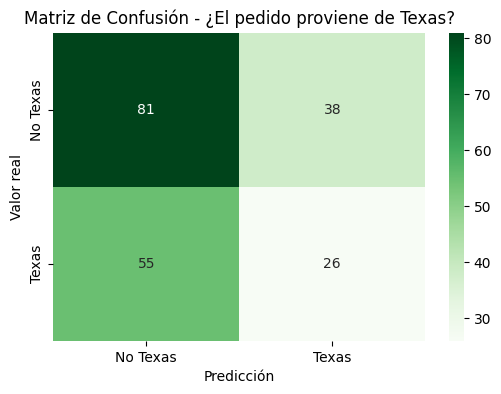

In [ ]:
# 9. Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Texas', 'Texas'], yticklabels=['No Texas', 'Texas'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - ¿El pedido proviene de Texas?')
plt.show()

la pregunta se debe cambiar a:
### ¿El pedido proviene de una ciudad del estado de Texas?